In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as polt
import sklearn

In [5]:
data=pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx")
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [7]:
data.shape

(768, 10)

In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [10]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [11]:
features=data.iloc[:,:-2]
prediction=data.iloc[:,-2:]

In [12]:
features.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [13]:
prediction.head()

,Y1,Y2
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


# Feature scaling:

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#Used to perform standardization of the features
features_scaled = scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns = features.columns)
features_scaled.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,2.041777,-1.785875,-0.561951,-1.470077,1.0,-1.341641,-1.760447,-1.814575
1,2.041777,-1.785875,-0.561951,-1.470077,1.0,-0.447214,-1.760447,-1.814575
2,2.041777,-1.785875,-0.561951,-1.470077,1.0,0.447214,-1.760447,-1.814575
3,2.041777,-1.785875,-0.561951,-1.470077,1.0,1.341641,-1.760447,-1.814575
4,1.284979,-1.229239,0.000000,-1.198678,1.0,-1.341641,-1.760447,-1.814575


# splitting

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(features_scaled, prediction,test_size=0.2, random_state=42, shuffle=True)

# EDA

In [42]:
Train_data = pd.concat([X_train, y_train], axis = 'columns', 
names=[features.columns, prediction.columns])
Train_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
60,0.528182,-0.672602,0.000000,-0.655880,1.0,-1.341641,-1.009323,-1.169393,23.53,27.31
618,-1.174613,1.275625,0.561951,0.972512,-1.0,0.447214,1.244049,-0.524211,18.90,22.09
346,0.906580,-0.950920,-0.561951,-0.655880,1.0,0.447214,0.117363,-0.524211,29.27,29.90
294,1.284979,-1.229239,0.000000,-1.198678,1.0,0.447214,0.117363,-1.169393,32.84,32.71
231,-0.985413,0.997307,0.000000,0.972512,-1.0,1.341641,-1.009323,0.766154,11.43,14.83


In [43]:
Train_data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,-0.023547,0.024100,0.007322,0.019964,-0.016287,0.010197,0.007875,-0.008275,22.155033,24.410765
std,0.997305,1.001505,0.993988,0.996094,1.000683,0.991593,1.007649,1.001263,10.054280,9.476566
min,-1.363812,-1.785875,-1.685854,-1.470077,-1.000000,-1.341641,-1.760447,-1.814575,6.010000,10.900000
25%,-0.985413,-0.672602,-0.561951,-0.655880,-1.000000,-0.447214,-1.009323,-1.008097,12.977500,15.640000
50%,-0.228616,0.162352,0.000000,0.972512,-1.000000,0.447214,0.117363,0.120972,18.250000,21.500000
75%,0.528182,0.997307,0.561951,0.972512,1.000000,0.447214,1.244049,0.766154,31.545000,32.920000
max,2.041777,1.553943,2.247806,0.972512,1.000000,1.341641,1.244049,1.411336,43.100000,48.030000


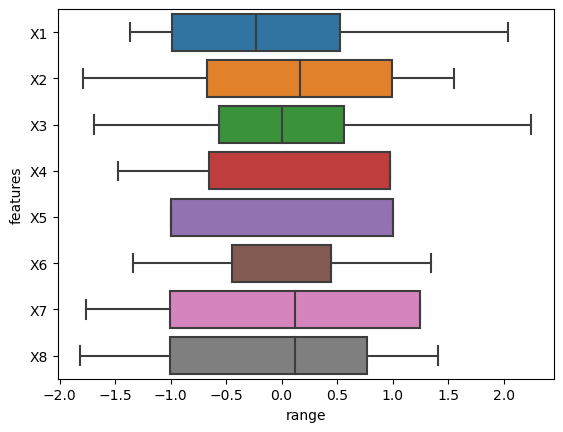

In [44]:
import seaborn as sns

sns.boxplot(data=X_train, orient='h').set(xlabel='range', ylabel='features')
polt.show()

# correlation analysis

In [45]:
corr_mat = Train_data.corr(method ='pearson') 
corr_mat

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000,-0.991923,-0.211912,-0.870389,0.831108,-0.003444,0.009575,0.001160,0.629314,0.642148
X2,-0.991923,1.000000,0.204776,0.881746,-0.860752,0.005307,-0.012996,-0.001782,-0.664684,-0.679988
X3,-0.211912,0.204776,1.000000,-0.281167,0.267395,0.014898,-0.019823,-0.012122,0.439092,0.410905
X4,-0.870389,0.881746,-0.281167,1.000000,-0.972779,-0.001977,-0.003189,0.004095,-0.863294,-0.864714
X5,0.831108,-0.860752,0.267395,-0.972779,1.000000,-0.007185,0.003697,-0.007357,0.889154,0.894927
X6,-0.003444,0.005307,0.014898,-0.001977,-0.007185,1.000000,0.029363,0.010337,0.001772,0.008773
X7,0.009575,-0.012996,-0.019823,-0.003189,0.003697,0.029363,1.000000,0.206917,0.276184,0.212642
X8,0.001160,-0.001782,-0.012122,0.004095,-0.007357,0.010337,0.206917,1.000000,0.080206,0.041308
Y1,0.629314,-0.664684,0.439092,-0.863294,0.889154,0.001772,0.276184,0.080206,1.000000,0.976316
Y2,0.642148,-0.679988,0.410905,-0.864714,0.894927,0.008773,0.212642,0.041308,0.976316,1.000000


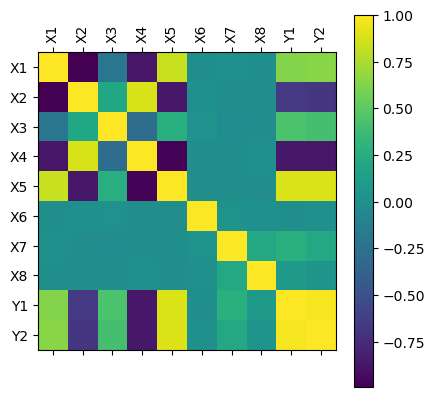

In [46]:
polt.matshow(corr_mat)
polt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation=90)
polt.yticks(range(len(corr_mat.columns)), corr_mat.columns)
polt.colorbar ()
polt. show()

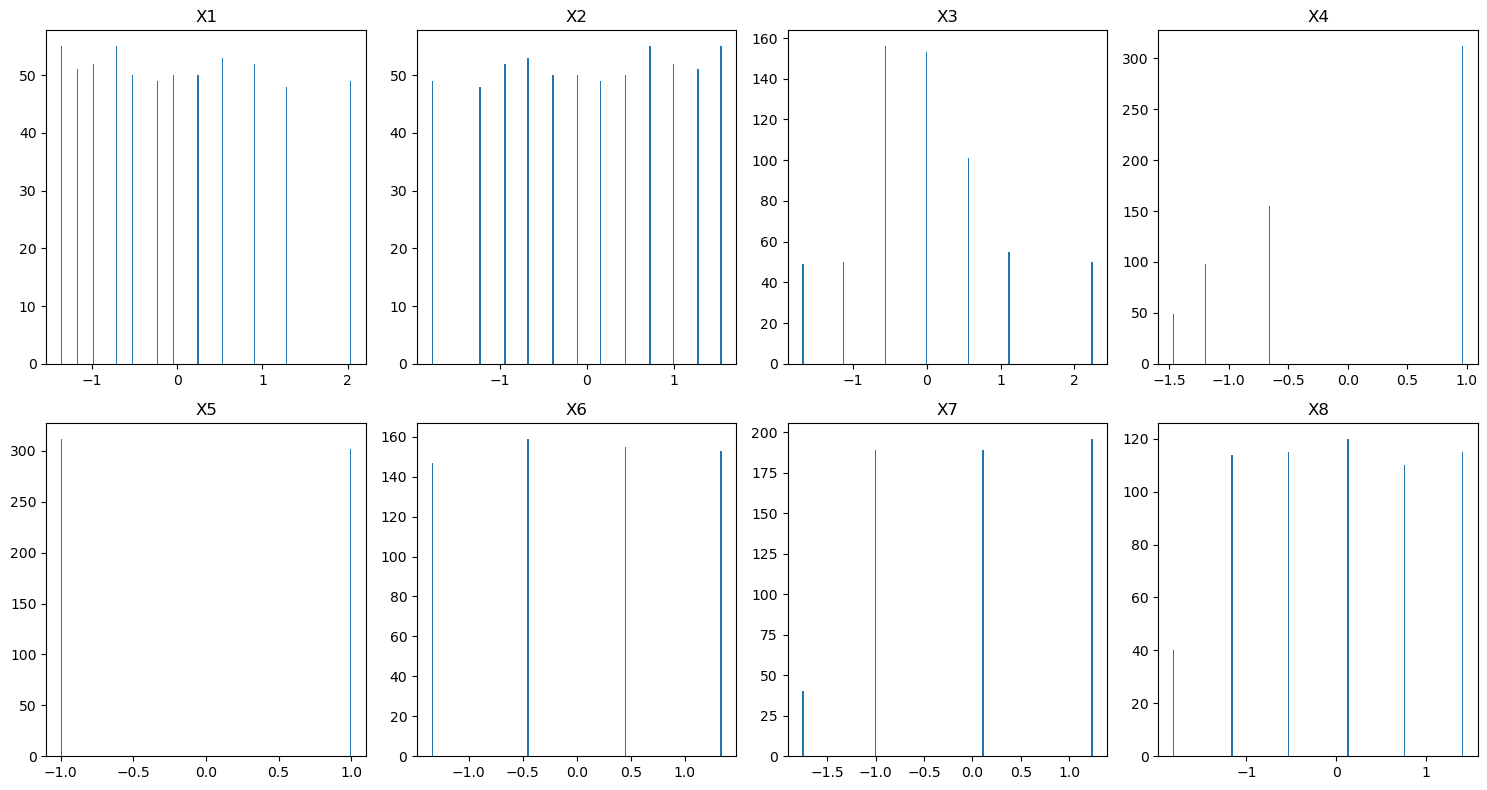

In [47]:
#showing histogram of each features

fig, axs = polt.subplots(2, 4, figsize=(15, 8))
axs = axs. flatten()
for i, col in enumerate(Train_data.columns[:-2]):
    axs[i].hist(Train_data[col], bins=200)
    axs[i].set_title(col)
polt.tight_layout()
polt. show()

In [48]:
# from above we came to know that the values of each features are almost same example X5 has only two unique values
# to see more precisely we can see the number of unique values in each features

In [49]:
unique_values=Train_data.nunique()
print(unique_values)

X1     12
X2     12
X3      7
X4      4
X5      2
X6      4
X7      4
X8      6
Y1    490
Y2    526
dtype: int64


/Users/karmesh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


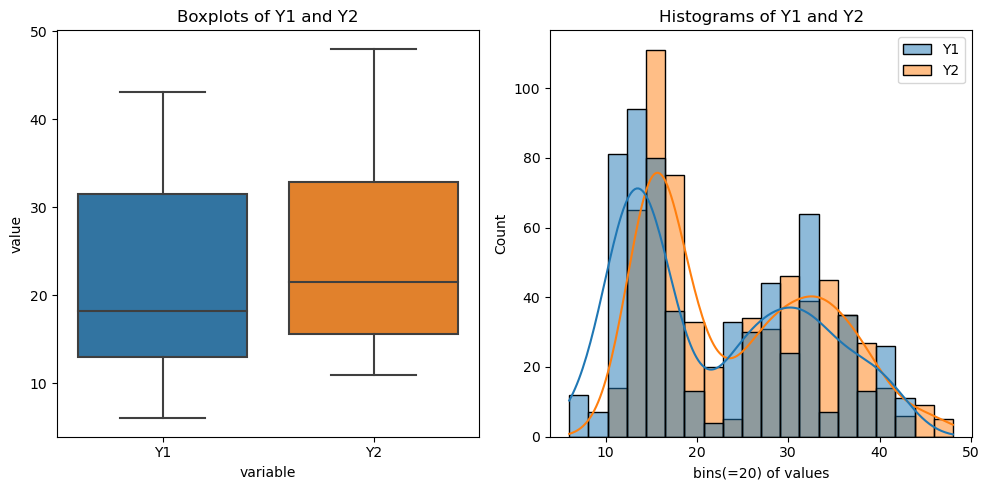

In [50]:
fig, axs = polt. subplots(1, 2, figsize=(10, 5))
axs = axs.flatten()
sns.boxplot (x="variable", y="value", data=pd.melt(Train_data[["Y1", "Y2"]]), ax=axs[0])
axs[0].set_title("Boxplots of Y1 and Y2")
sns.histplot (data=Train_data[["Y1", "Y2"]], ax=axs[1], bins=20, kde=True)
axs[1].set(xlabel='bins(=20) of values')
axs[1].set_title("Histograms of Y1 and Y2")
polt. tight_layout ()
polt. show()

In [52]:
from sklearn.neighbors import KNeighborsRegressor

model = knn = KNeighborsRegressor(n_neighbors=7) #K=7(hyperparameter)
model. fit(X_train, y_train) #Training the model on train data
y_pred_train = model. predict(X_train) #Make predictions on the training set
y_pred = model.predict(X_test) #Make predictions on the testing set



In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Print the evaluation metrics on train data

print ("Evaluation metrics: Train Data") 
print ("Mean absolute error: ", mae_train) 
print ("Mean squared error: ", mse_train) 
print ("R-squared score: ", r2_train)

Evaluation metrics: Train Data
Mean absolute error:  1.4895253606328533
Mean squared error:  4.894184441268367
R-squared score:  0.9480958275832815


In [58]:
mse = mean_squared_error (y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics on test data

print ("Evaluation metrics: Test Data") 
print ("Mean absolute error: ", mae) 
print ("Mean squared error: ", mse) 
print ("R-squared score: ", r2)

Evaluation metrics: Test Data
Mean absolute error:  1.6179118738404459
Mean squared error:  6.190752025178901
R-squared score:  0.9364868272663291


# feature selection

In [60]:
X_train_selected = X_train.drop(['X6', 'X8'], axis=1, inplace=False)
X_test_selected = X_test.drop(['X6', 'X8'], axis=1, inplace=False)

In [62]:

model_selected = knn = KNeighborsRegressor(n_neighbors=7) #K=7
model_selected. fit (X_train_selected, y_train) #Training the model on train data
y_pred_train_selected = model_selected.predict(X_train_selected) #Make predictions on the training set
y_pred_test_selected = model_selected. predict (X_test_selected) #Make predictions on the testing set



In [66]:
#Check the R2 score

r2_train_selected = r2_score(y_train, y_pred_train_selected)
print ('Train r2 score after featrue selection: ', r2_train_selected)
r2_test_selected = r2_score(y_test, y_pred_test_selected)
print('Test r2 score after featrue selection: ', r2_test_selected)

Train r2 score after featrue selection:  0.977536541785205
Test r2 score after featrue selection:  0.9757391856948794


# hyperparameter tuning

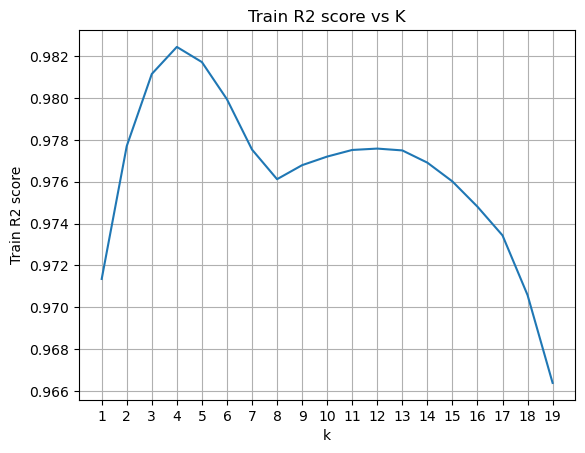

In [77]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

k_values = list(range(1, 20))

# k ranges between 1 and 19
model_best = KNeighborsRegressor()

# Notice that the value of k is now inserted here
r2_values, mse_values = [], []
for k in k_values:
    model_best.set_params(n_neighbors=k)
    model_best.fit(X_train_selected, y_train)
    y_pred_current = model_best.predict(X_train_selected)
    r2_current = r2_score(y_train, y_pred_current)
    r2_values.append(r2_current)
    mse_current = mean_squared_error(y_train, y_pred_current)
    mse_values.append(mse_current)

# Plot the variation of R2 for various values of k
plt.plot(k_values, r2_values)
plt.title("Train R2 score vs K")
plt.xlabel("k")
plt.ylabel("Train R2 score")
plt.xticks(k_values)
plt.grid()
plt.show()


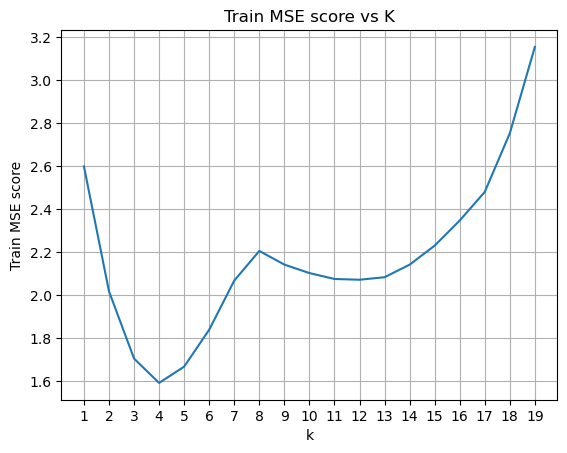

In [84]:
import matplotlib.pyplot as plt


plt.plot(k_values, mse_values)
plt. title("Train MSE score vs K")
plt.xlabel("k")
plt.ylabel ("Train MSE score")
plt.xticks (k_values)
plt.grid()
plt. show()

In [87]:
k_best = k_values[np.argmax(r2_values)]
model_best.set_params (n_neighbors=k_best)
model_best. fit (X_train_selected, y_train)
y_train_pred_best = model_best.predict (X_train_selected)
y_test_pred_best = model_best.predict (X_test_selected)
r2_best_train = r2_score(y_train, y_train_pred_best)
r2_best_test = r2_score(y_test, y_test_pred_best)
print("Best K: ", k_best)
print ('Train R2 score: ', r2_best_train)
print ("Test R2 score: ",r2_best_test)

Best K:  4
Train R2 score:  0.9824436433378749
Test R2 score:  0.9755233912083161
